In [1]:
%matplotlib notebook

In [57]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Preprocessing

In [3]:
df = pd.read_csv('PS_20174392719_1491204439457_log.csv')


In [6]:
df.shape

(6362620, 11)

In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [3]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [4]:
df[['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest']].drop_duplicates().shape

(6362620, 9)

- Нету полных дубликатов

In [7]:
df[['nameOrig', 'nameDest', 'step']].drop_duplicates().shape

(6362620, 3)

In [11]:
df[['nameOrig', 'step']].drop_duplicates().shape

(6362573, 2)

In [12]:
df[['nameDest', 'step']].drop_duplicates().shape

(6046187, 2)

- Нету дубликатов внутри одного временного интервала.
- Есть дубликаты в комбинациях отправителя и шага.
- Есть дубликаты в комбинациях получателя и шага.


- Аггрегируются по шагу в комбинациях отправителя и получателя, либо в один шаговый интервал можно делать только 1 раз совместную транзакцию.

In [13]:
df[['nameOrig', 'nameDest']].drop_duplicates().shape

(6362620, 2)

- Все комбинации отправителя и получателя уникальны.

In [29]:
df['nameOrig'].describe()

count         6362620
unique        6353307
top       C1902386530
freq                3
Name: nameOrig, dtype: object

In [16]:
df['nameDest'].value_counts().head(50)

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C451111351      99
C1789550256     99
C1360767589     98
C1023714065     97
C977993101      96
C97730845       96
C392292416      95
C1899073220     92
C306206744      91
C1234776885     90
C1782113663     90
C998351292      89
C716083600      89
C909295153      88
C667346055      86
C1674899618     86
C1262822392     85
C1816757085     84
C1255024717     84
C453211571      84
C2006081398     83
C932583850      82
C1504109395     82
C991363637      82
C1303868418     81
C728526866      81
C214774813      80
C33524623       80
C1883840933     80
C1870252780     80
C766681183      80
C1721246982     80
C11003494       80
C1909597726     80
C662736689      79
C1167066016     79
C769342184      78
C423580937      77
C803116137      77
C1297685781     76
C1850180796     76
C1730752455     76
C863811613      75
C2049813033     75
Name: count, dtype: int64

- Большинство оригинаторов уникальные, максимальное кол-во транзакции 3.
- Адресаты имеют больше дубликатов, максимум 113 раз.

- Данные - уже являются дневными (или другой шаг) суммами транзакции между двумя сторонами. 
- Повторные транзакции между одинаковыми сторонами не происходят. 
- Отправители, в основном, уникальные. 
- Получатели повторяются чаще, скорее всего продавцы или поставщики услуг (мерчанты).

In [20]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Нет пропусков

# EDA

## Correlations, Distributions and Transaction Types

<IPython.core.display.Javascript object>


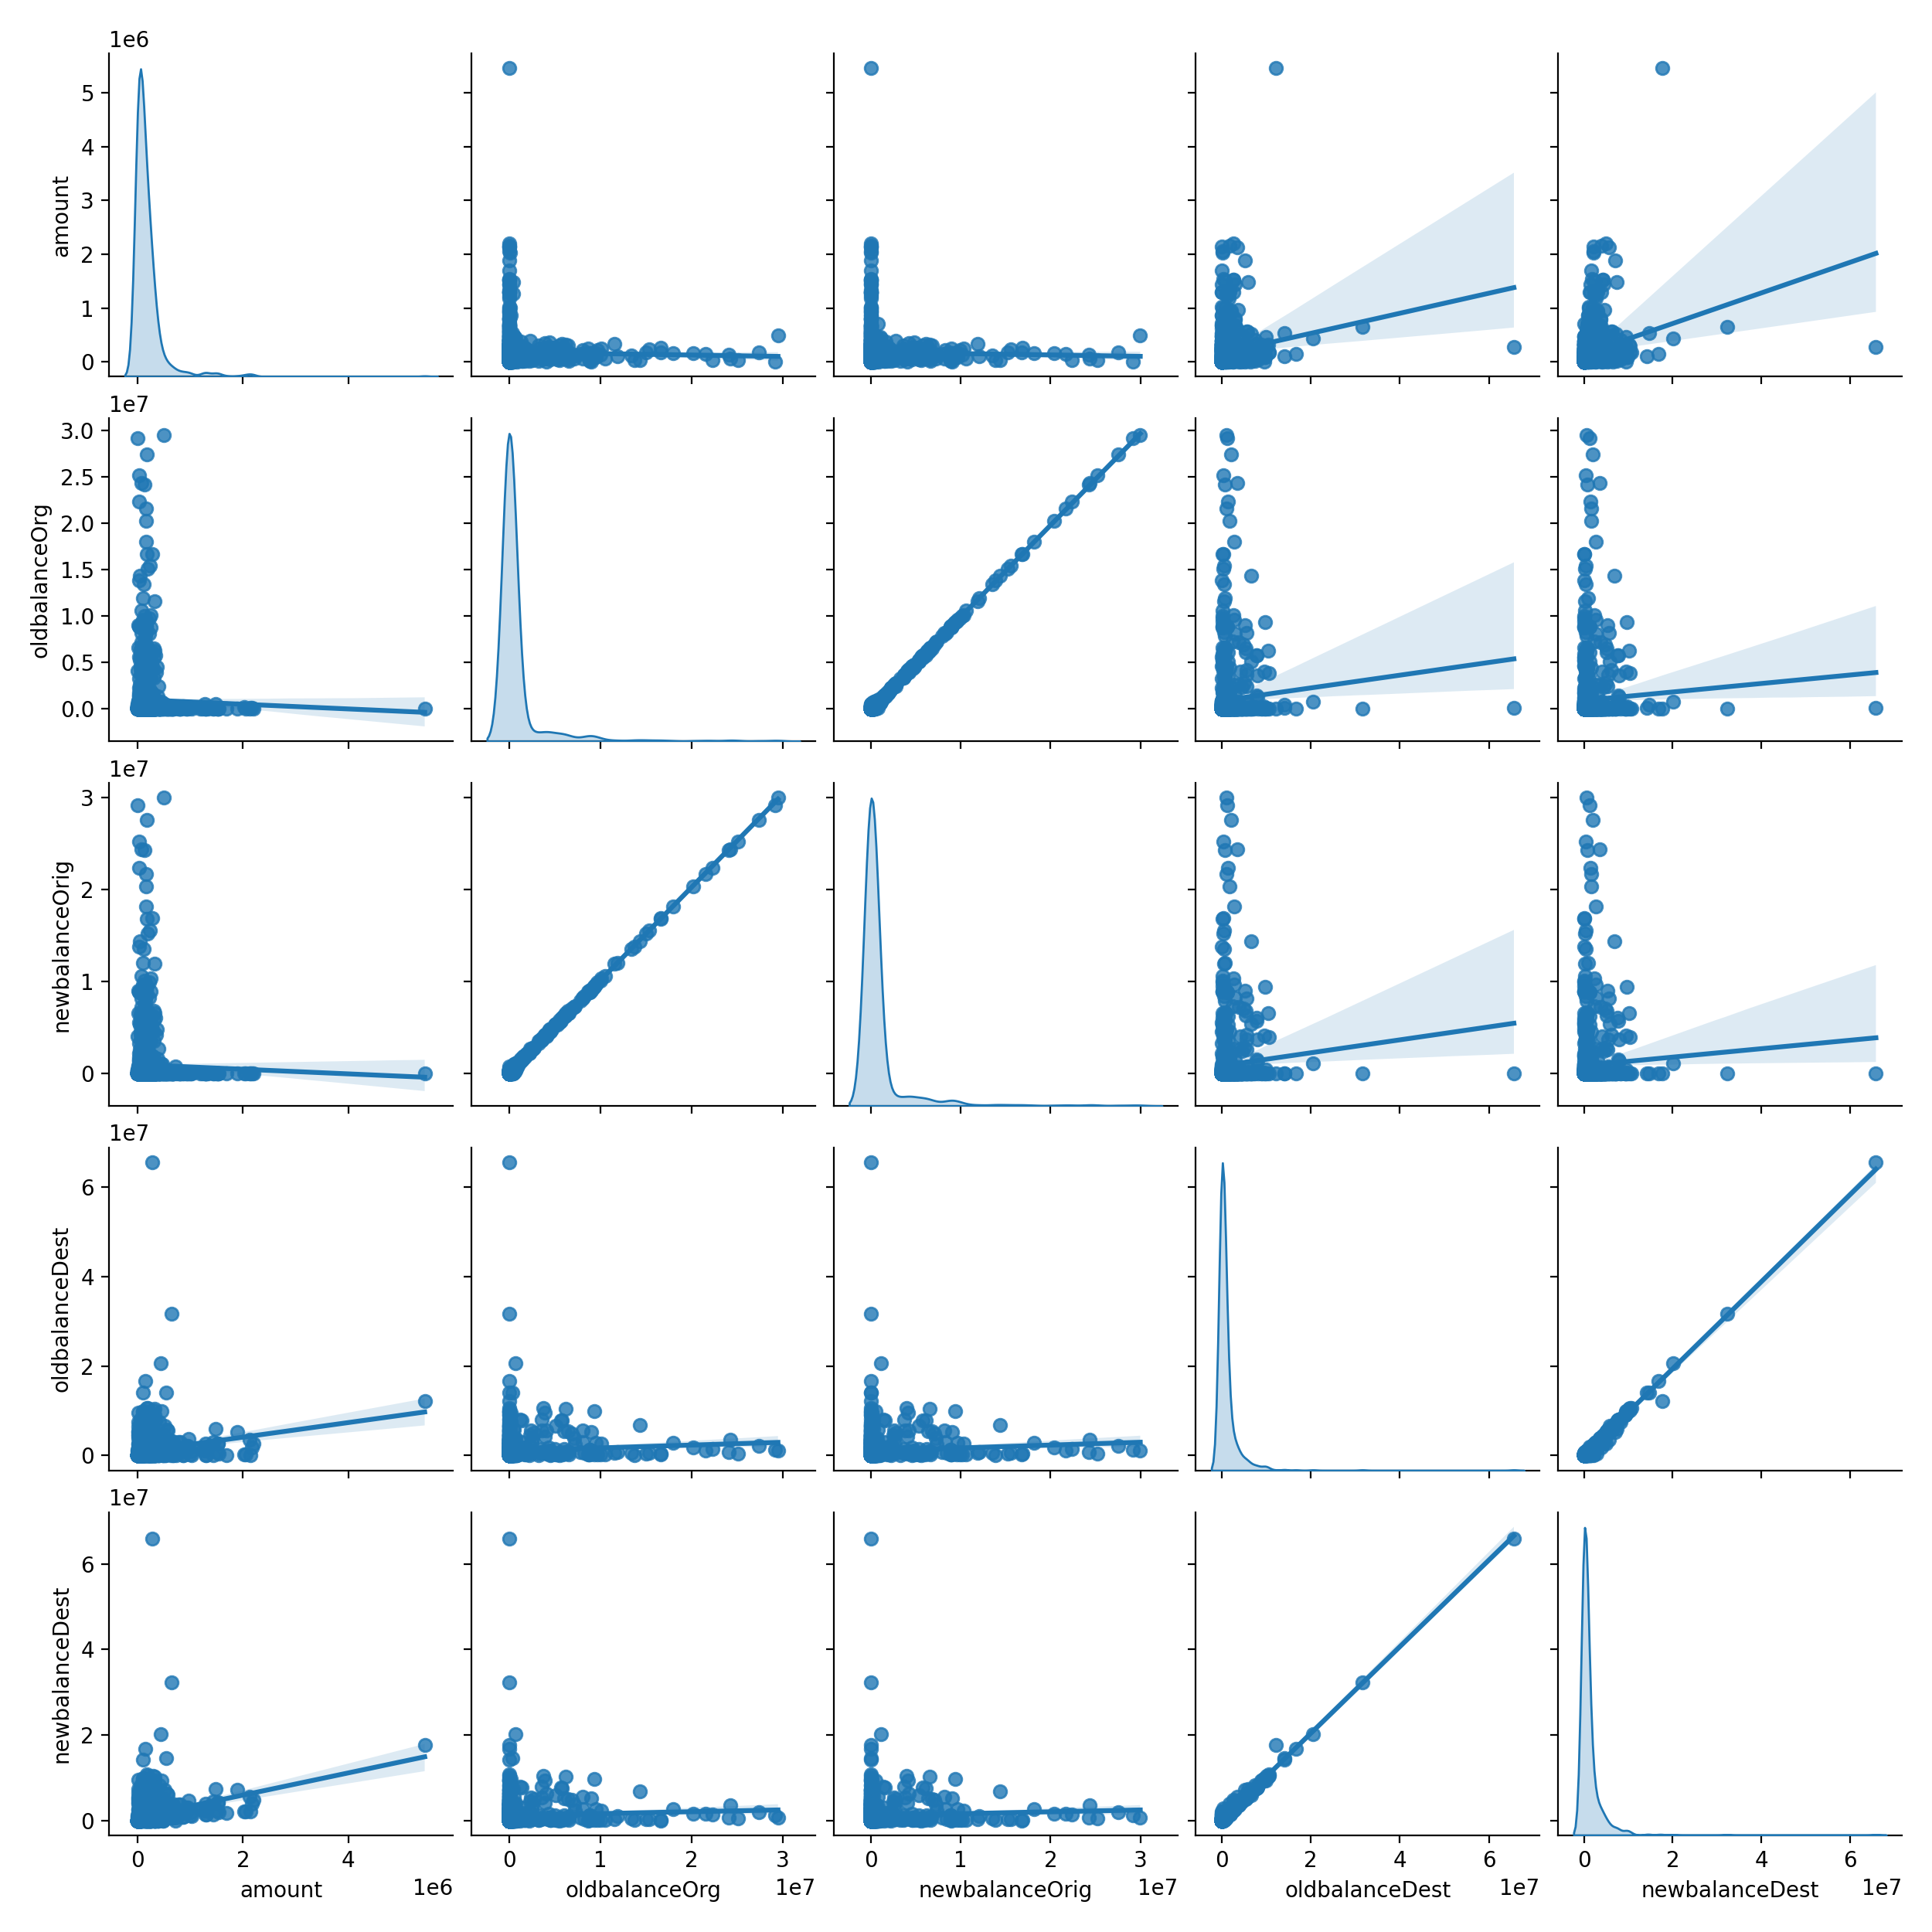

In [45]:
sns.pairplot(df[[
    'amount', 
    'oldbalanceOrg',
    'newbalanceOrig',
    'oldbalanceDest',
    'newbalanceDest']].sample(1000),
    kind='reg',
    diag_kind='kde'
);

- Никаких странных зависимостей, в целом, но есть множество транзакции с ненулевой суммой. 
- Назовем эту разницу дельтой, куда могут входить: оплата за сервисы, коммиссии при отрицательных значениях или разлинчые виды пополнении при положительном.

In [62]:
df['balanceChngOrig'] = (df['newbalanceOrig'] - df['oldbalanceOrg'])
df['balanceChngDest'] = (df['newbalanceDest'] - df['oldbalanceDest'])
df['balanceDelta'] = df['balanceChngOrig'] + df['balanceChngDest']


<IPython.core.display.Javascript object>


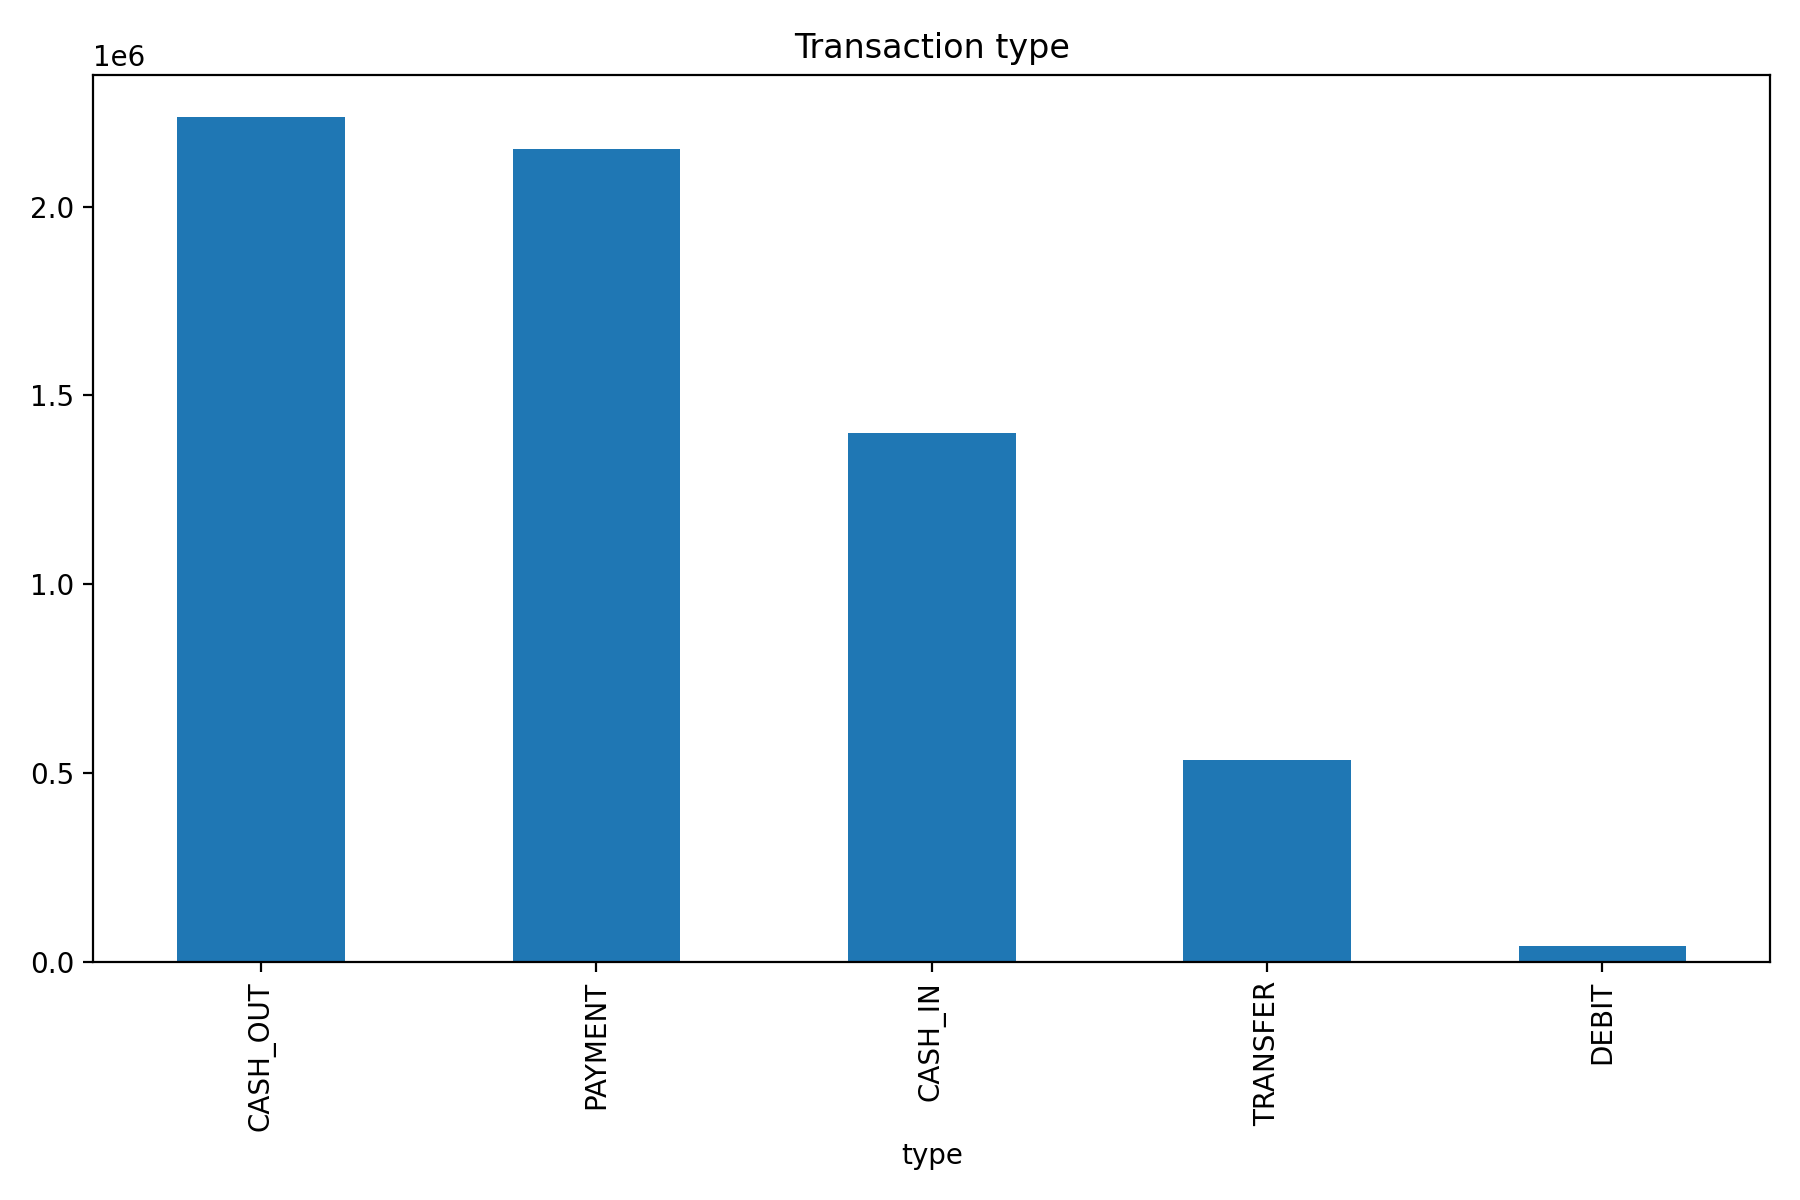

In [32]:
f, ax = plt.subplots(1, 1, figsize=(5, 1))
df.type.value_counts().plot(kind='bar', title="Transaction type", ax=ax, figsize=(9,6))
plt.tight_layout();

In [38]:
df['isFraud'].sum()

8213

<IPython.core.display.Javascript object>


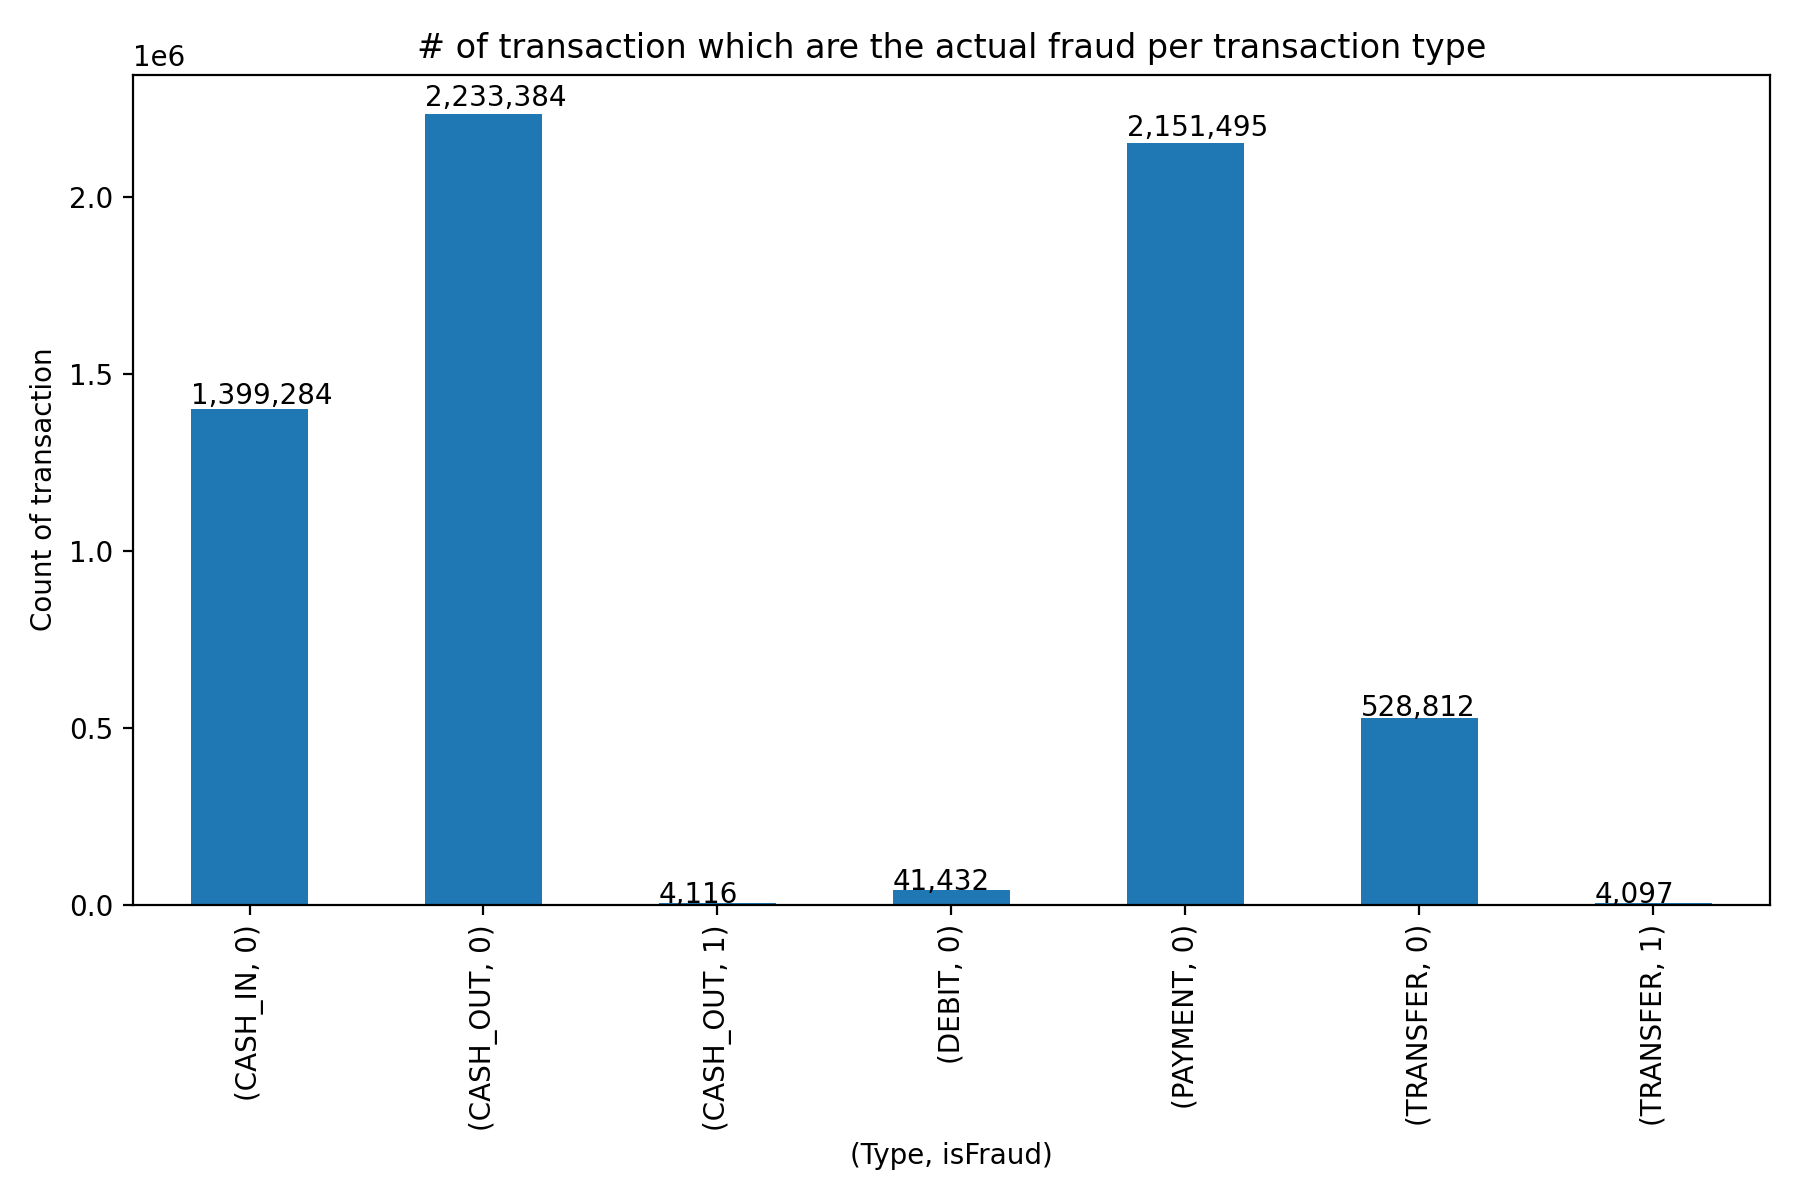

In [37]:
f, ax = plt.subplots(1, 1, figsize=(9, 6))
ax = df.groupby(['type', 'isFraud']).size().plot(kind='bar')
ax.set_title("# of transaction which are the actual fraud per transaction type")
ax.set_xlabel("(Type, isFraud)")
ax.set_ylabel("Count of transaction")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
plt.tight_layout();


- Фроды только в CASH_OUT и TRASFER поровну. 
- CASH_OUT имеет намного меньшее соотношение позитивных к негативным в сравнении с TRANSFER - 0.18% против 0.77% соответственно.

In [70]:
df_only_badtypes = df[df['type'].isin(['CASH_OUT', 'TRANSFER'])]
df_only_badtypes['isFraud_type'] = df_only_badtypes['type'] + '_' + df_only_badtypes['isFraud'].astype(str)


/var/folders/f4/lwpnx61j46nf6mcfpw7j_sc00000gn/T/ipykernel_3589/1217329129.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_only_badtypes['isFraud_type'] = df_only_badtypes['type'] + '_' + df_only_badtypes['isFraud'].astype(str)


## Feature distributions accross types

<IPython.core.display.Javascript object>


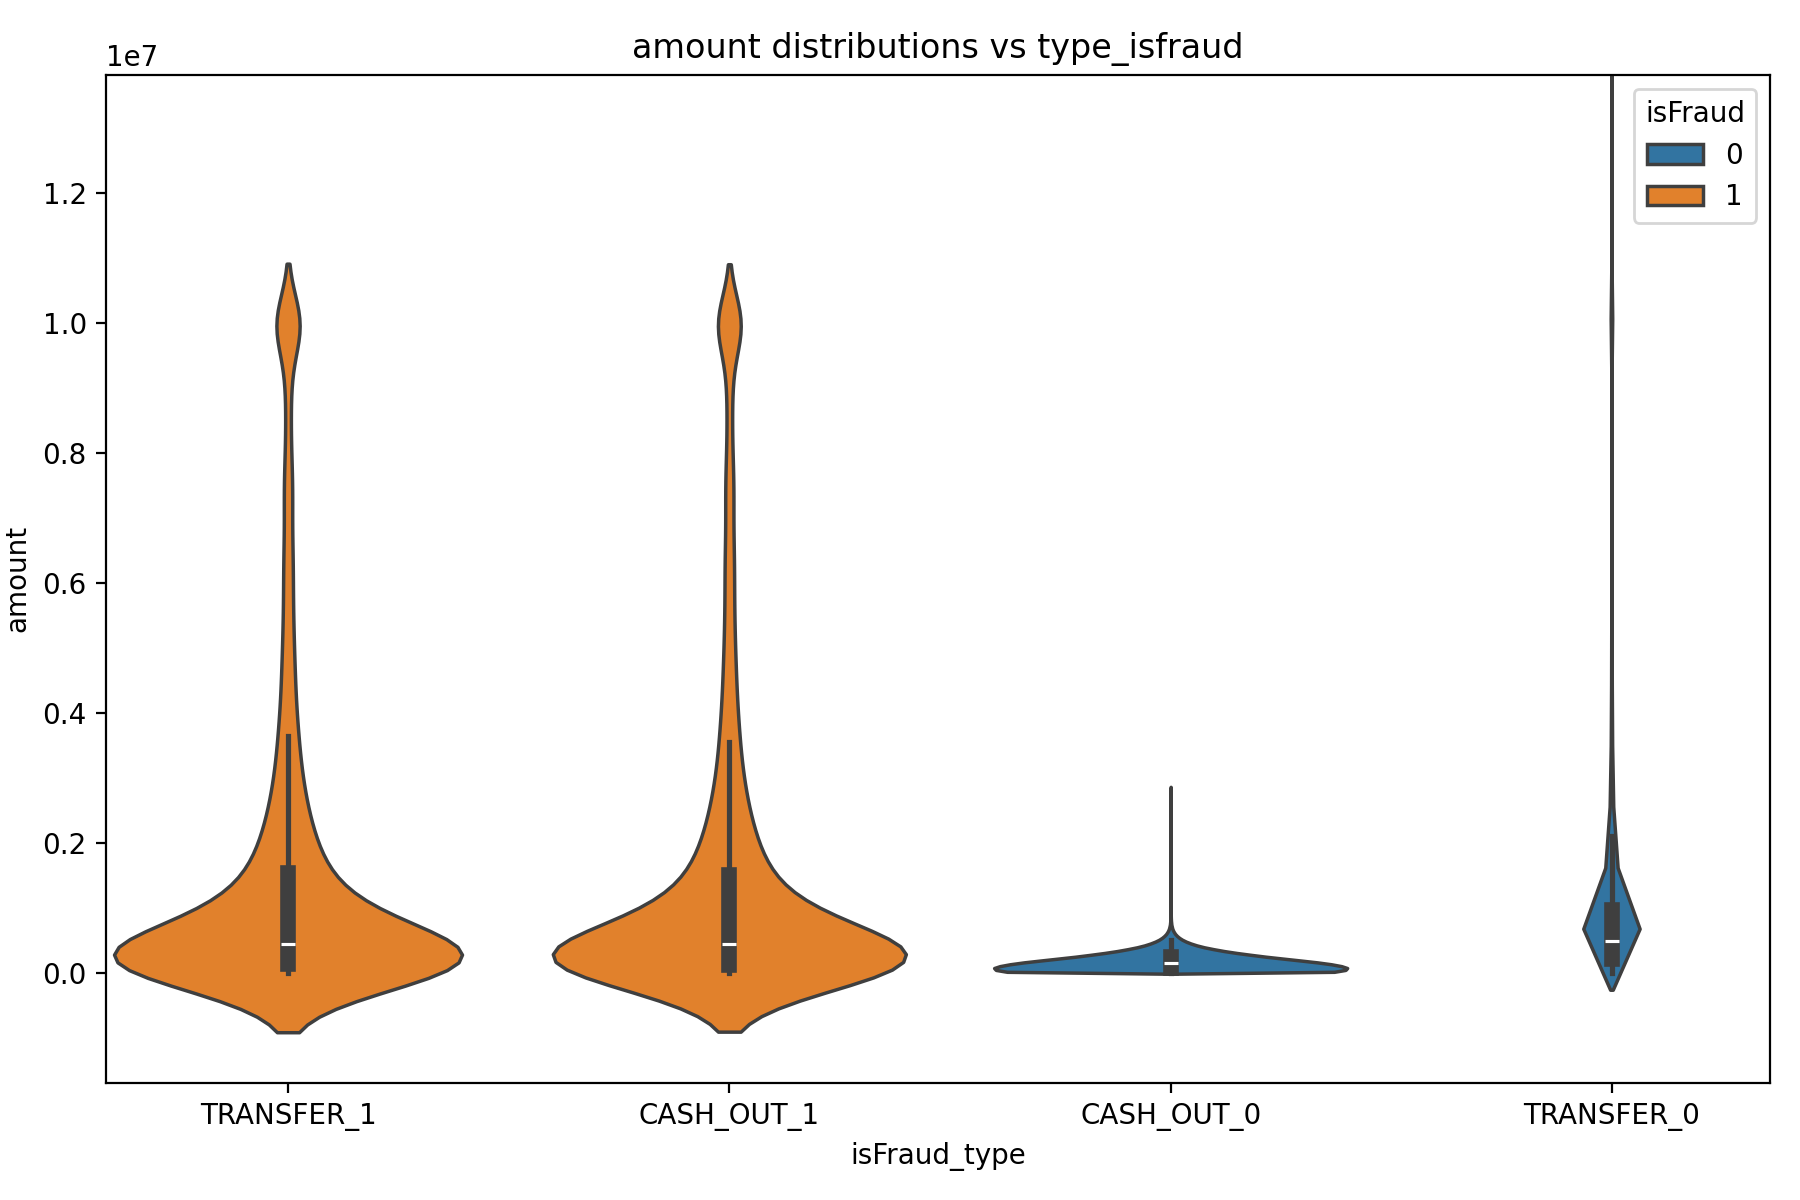

In [72]:
y = 'amount'

fig, ax = plt.subplots(1, 1, figsize=(9, 6))
sns.violinplot(data=df_only_badtypes, x='isFraud_type', hue='isFraud', y=y)
ax.set_title(f'{y} distributions vs type_isfraud')
plt.tight_layout();


- Amount не бывает отрицательным в честных сделках.
- Распределения amount и в переводах и в выводах одинаковы. Скорее всего какие-то похожие схемы в плане объемов денег.
- Добропорядочные выводы средств имеют узкое распределение, сконцентрированы в районе <= 1e6
- Добропорядочные переводы имеют более широкое распределение, с большим кол-вом аутлаеров.

<IPython.core.display.Javascript object>


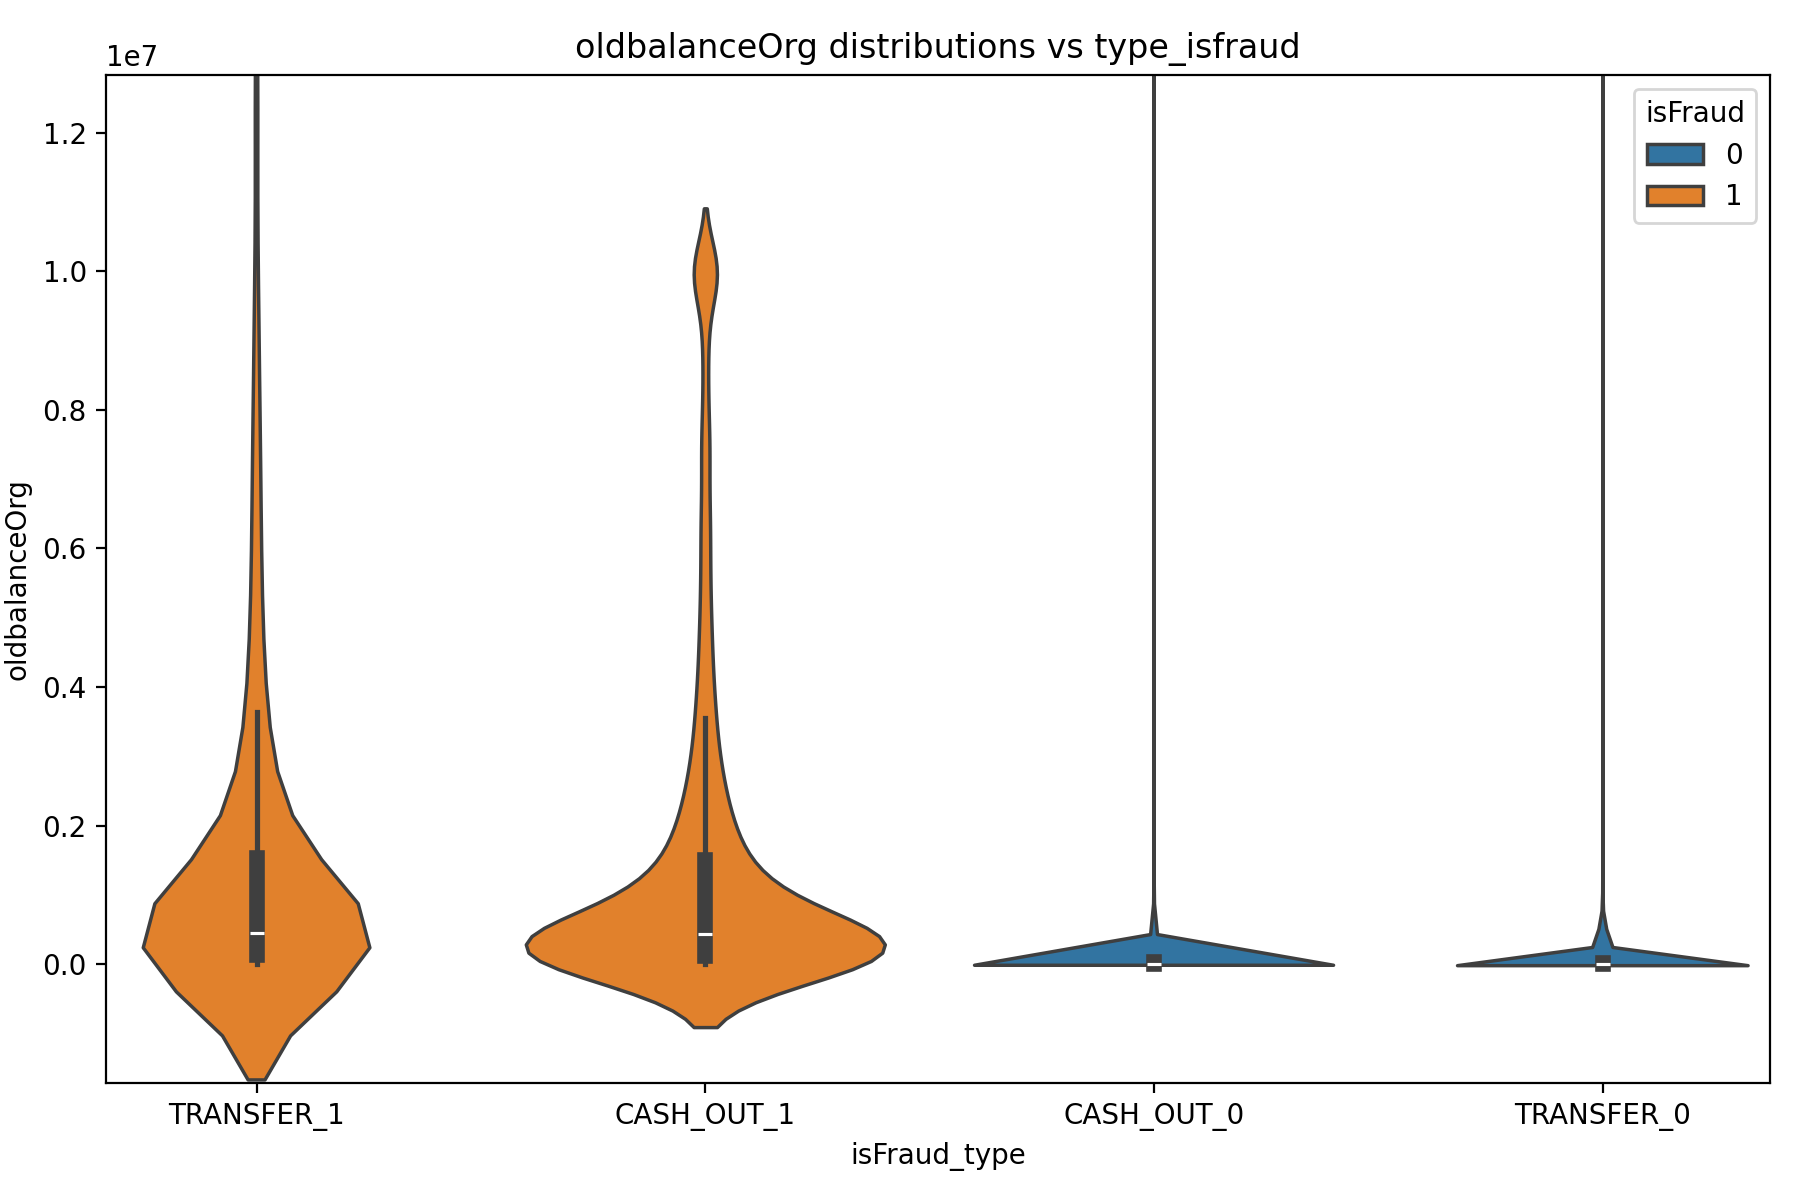

In [74]:
y = 'oldbalanceOrg'

fig, ax = plt.subplots(1, 1, figsize=(9, 6))
sns.violinplot(data=df_only_badtypes, x='isFraud_type', hue='isFraud', y=y)
ax.set_title(f'{y} distributions vs type_isfraud')
plt.tight_layout();


- Отправители не имеют отрицательный баланс в честных сделках. Распределения узкие (<1e6) с большим кол-вом аутлаеров. 
- У мошенников изначальные балансы более широко распределены и намного выше, в среднем, чем у честных. Могут иметь отрицательные значения.

<IPython.core.display.Javascript object>


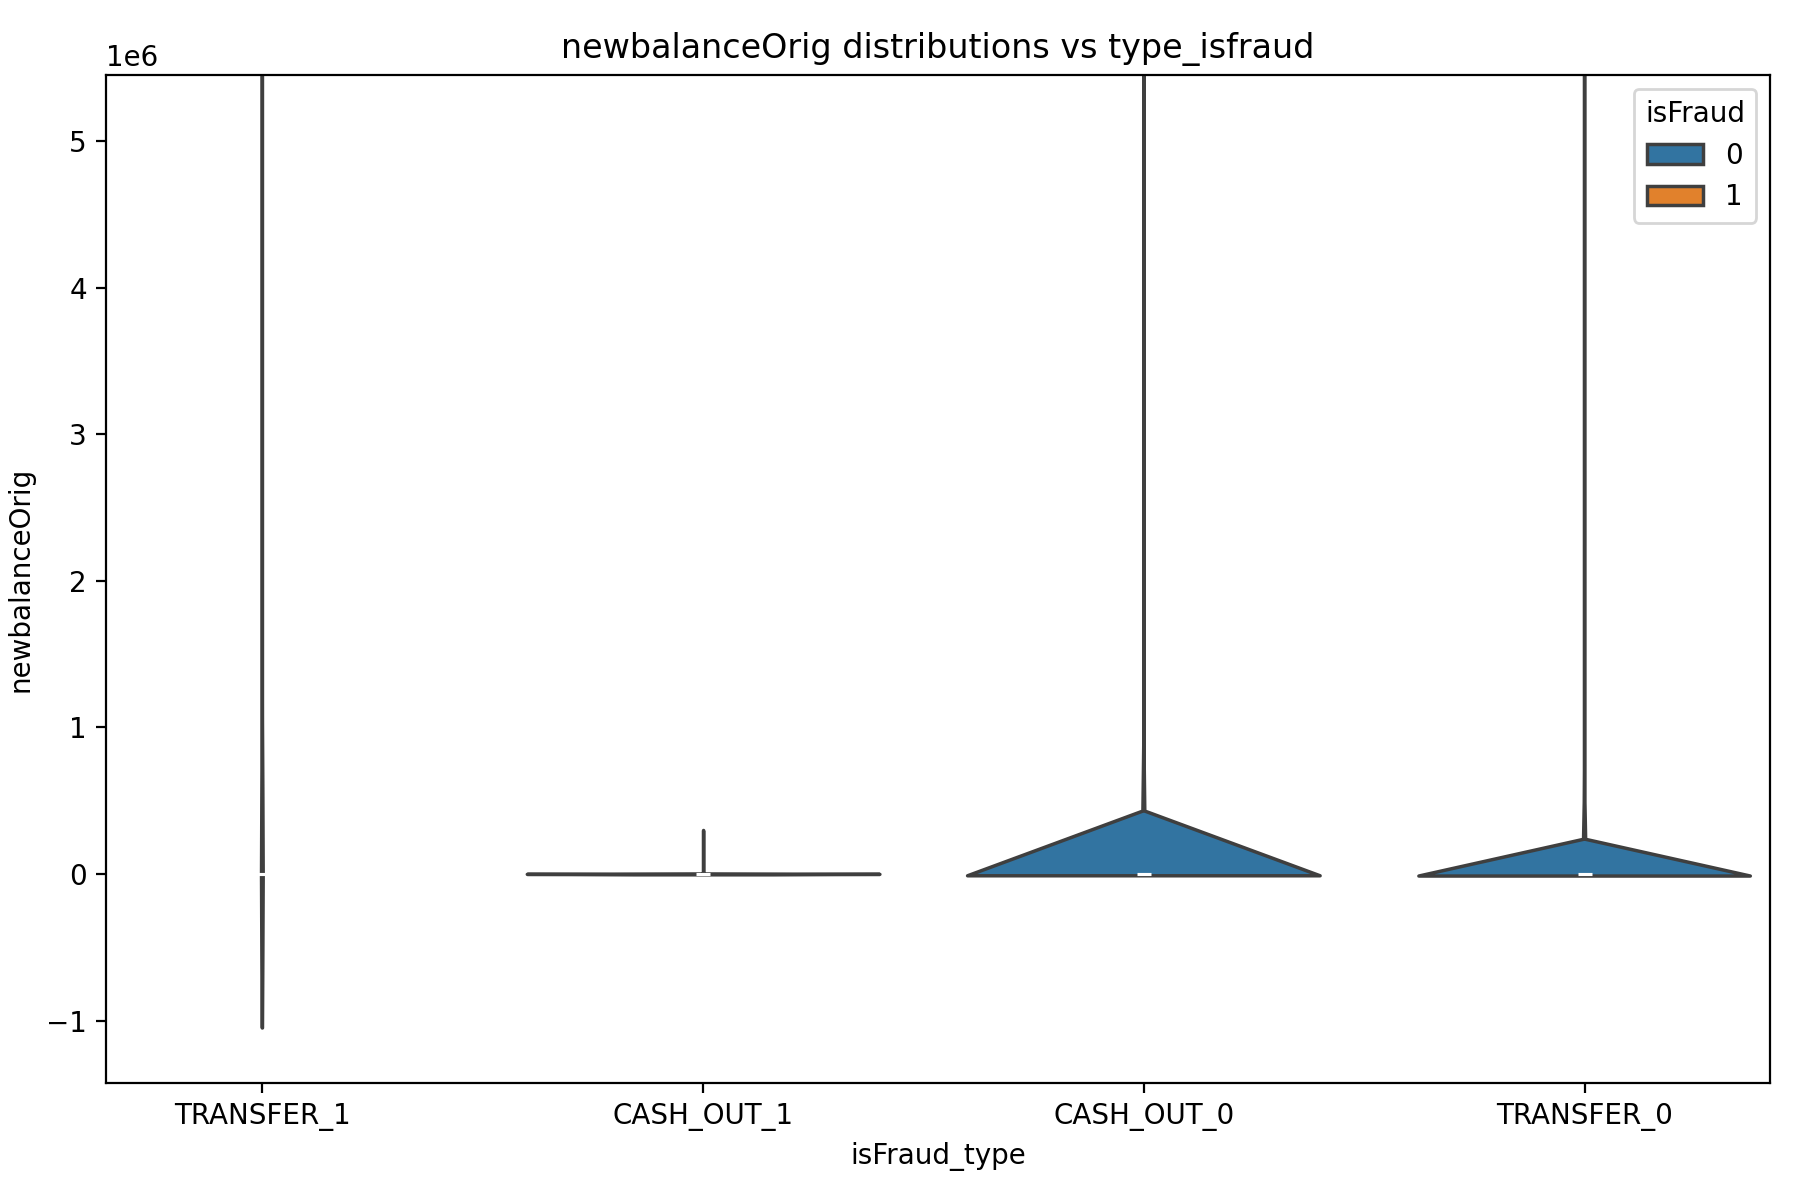

In [76]:
y = 'newbalanceOrig'

fig, ax = plt.subplots(1, 1, figsize=(9, 6))
sns.violinplot(data=df_only_badtypes, x='isFraud_type', hue='isFraud', y=y)
ax.set_title(f'{y} distributions vs type_isfraud')
plt.tight_layout();


- При выводе мошенники, в основном, не оставляли баланса на счете.
- При переводе мошенники имели разные значения остатков на счете, без заметных тенденции.
- Честные сделки сконцентрированы в значениях < 0.5e6 и для выводов и для переводов.
- При мошенническом переводе, у отправителя бывали случаи с отрицательным финальным балансом. Во всех остальных случаях, отрицательных значении не было.

<IPython.core.display.Javascript object>


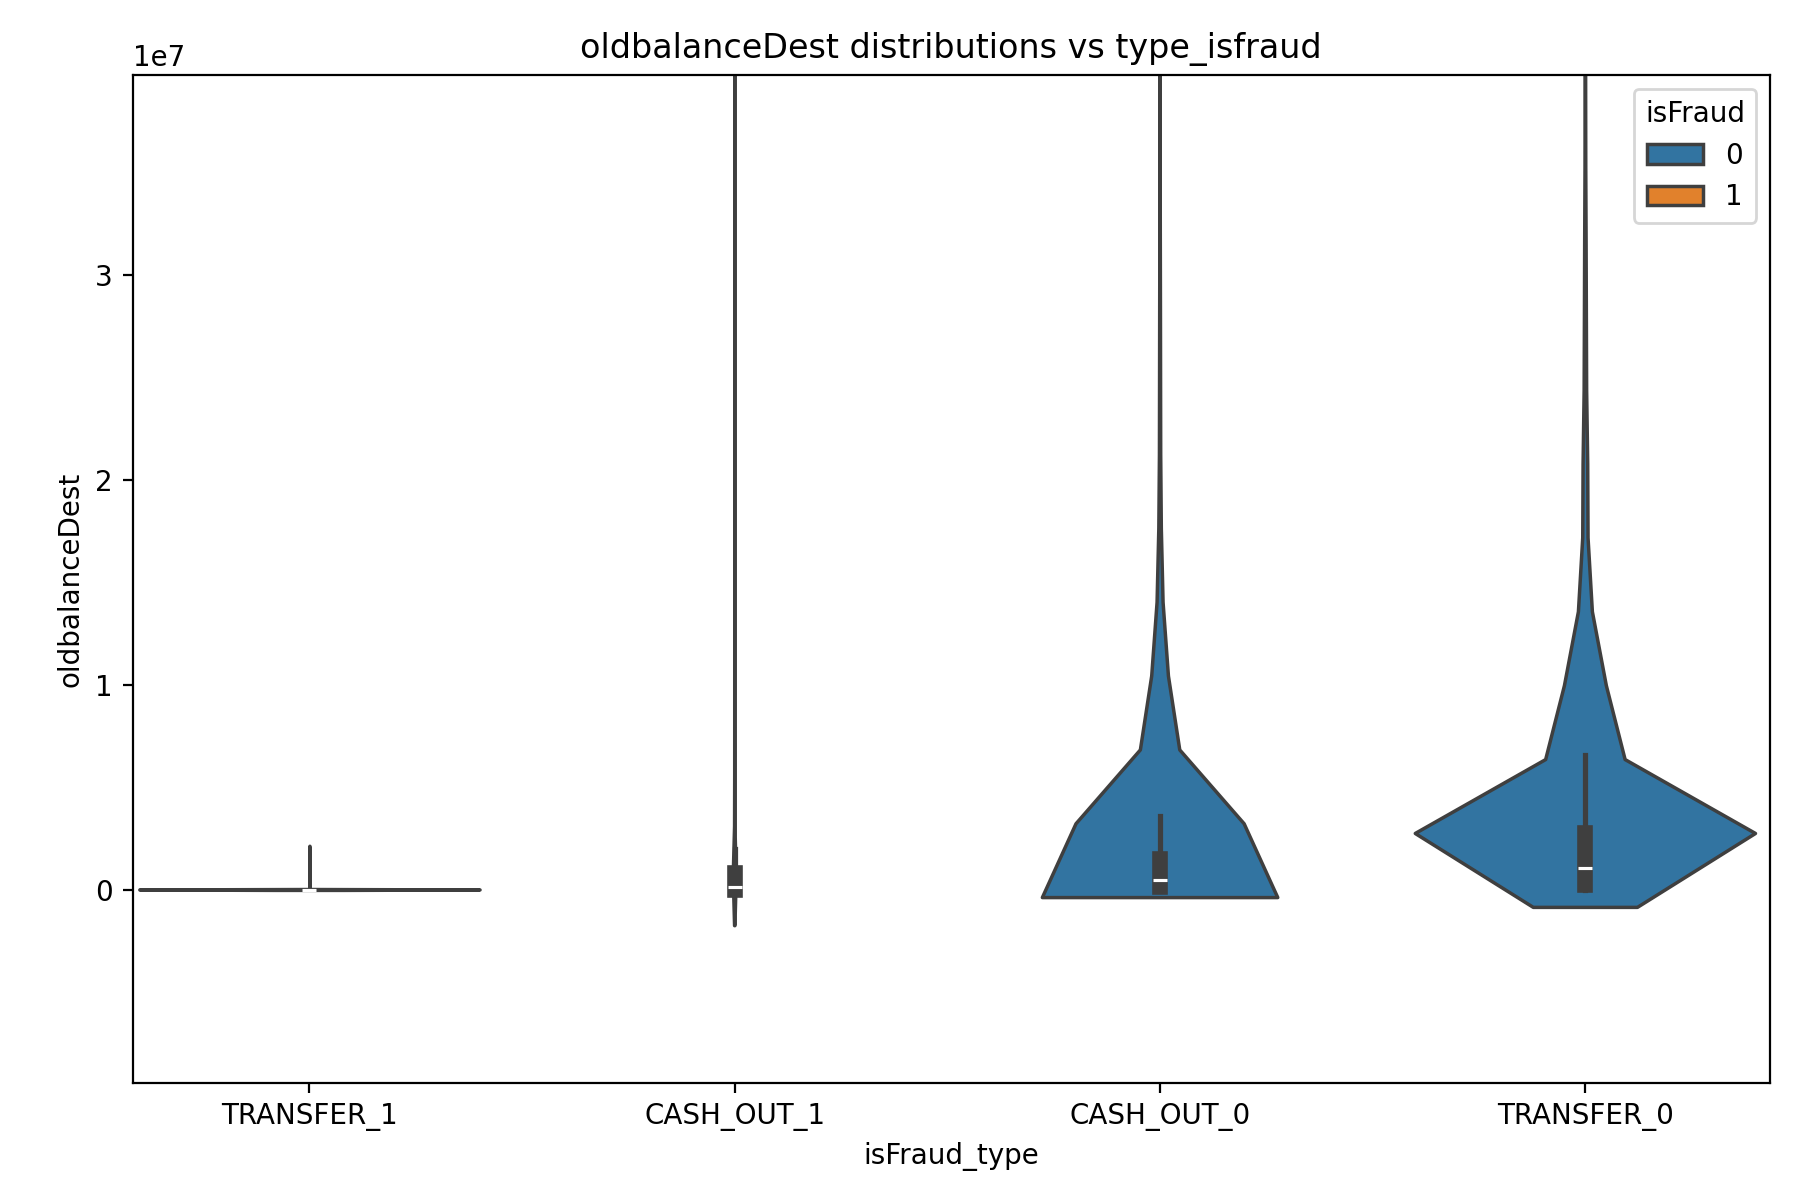

In [77]:
y = 'oldbalanceDest'

fig, ax = plt.subplots(1, 1, figsize=(9, 6))
sns.violinplot(data=df_only_badtypes, x='isFraud_type', hue='isFraud', y=y)
ax.set_title(f'{y} distributions vs type_isfraud')
plt.tight_layout();


- При мошенническом переводе изначальный баланс получателя зачастую 0. При выводе - тоже, но там больше вариативнсти и аутлаеров.
- При мошенническом выводе бывают отрицательные изначальные балансы у получателей, во всех остальных кейсах только положительные.
- Изначальные балансы получателей при добросовестных транзациях распределены более нормально, с усеченной отрицательной частью.

<IPython.core.display.Javascript object>


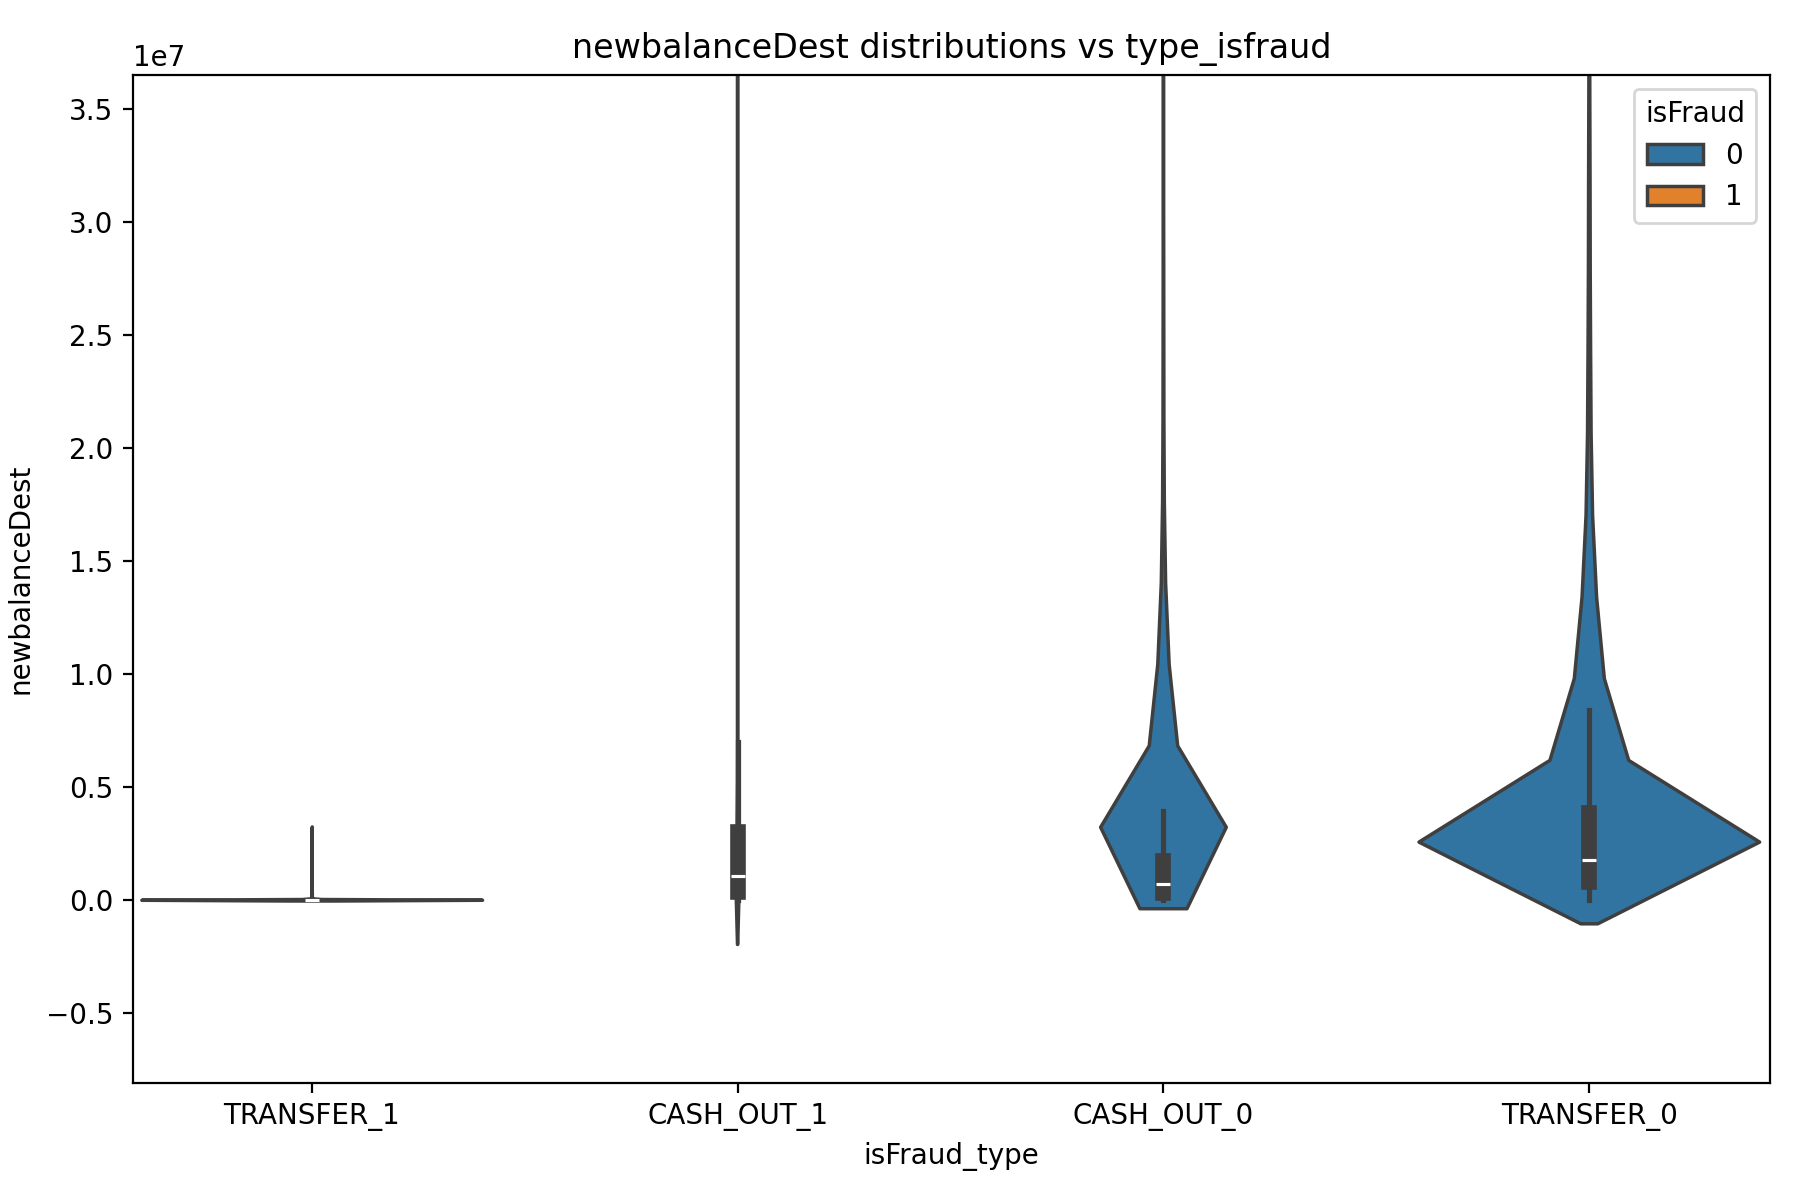

In [78]:
y = 'newbalanceDest'

fig, ax = plt.subplots(1, 1, figsize=(9, 6))
sns.violinplot(data=df_only_badtypes, x='isFraud_type', hue='isFraud', y=y)
ax.set_title(f'{y} distributions vs type_isfraud')
plt.tight_layout();


- С финальными балансами получаетелей аналогично, как с изначальными балансами (сверху). 

<IPython.core.display.Javascript object>


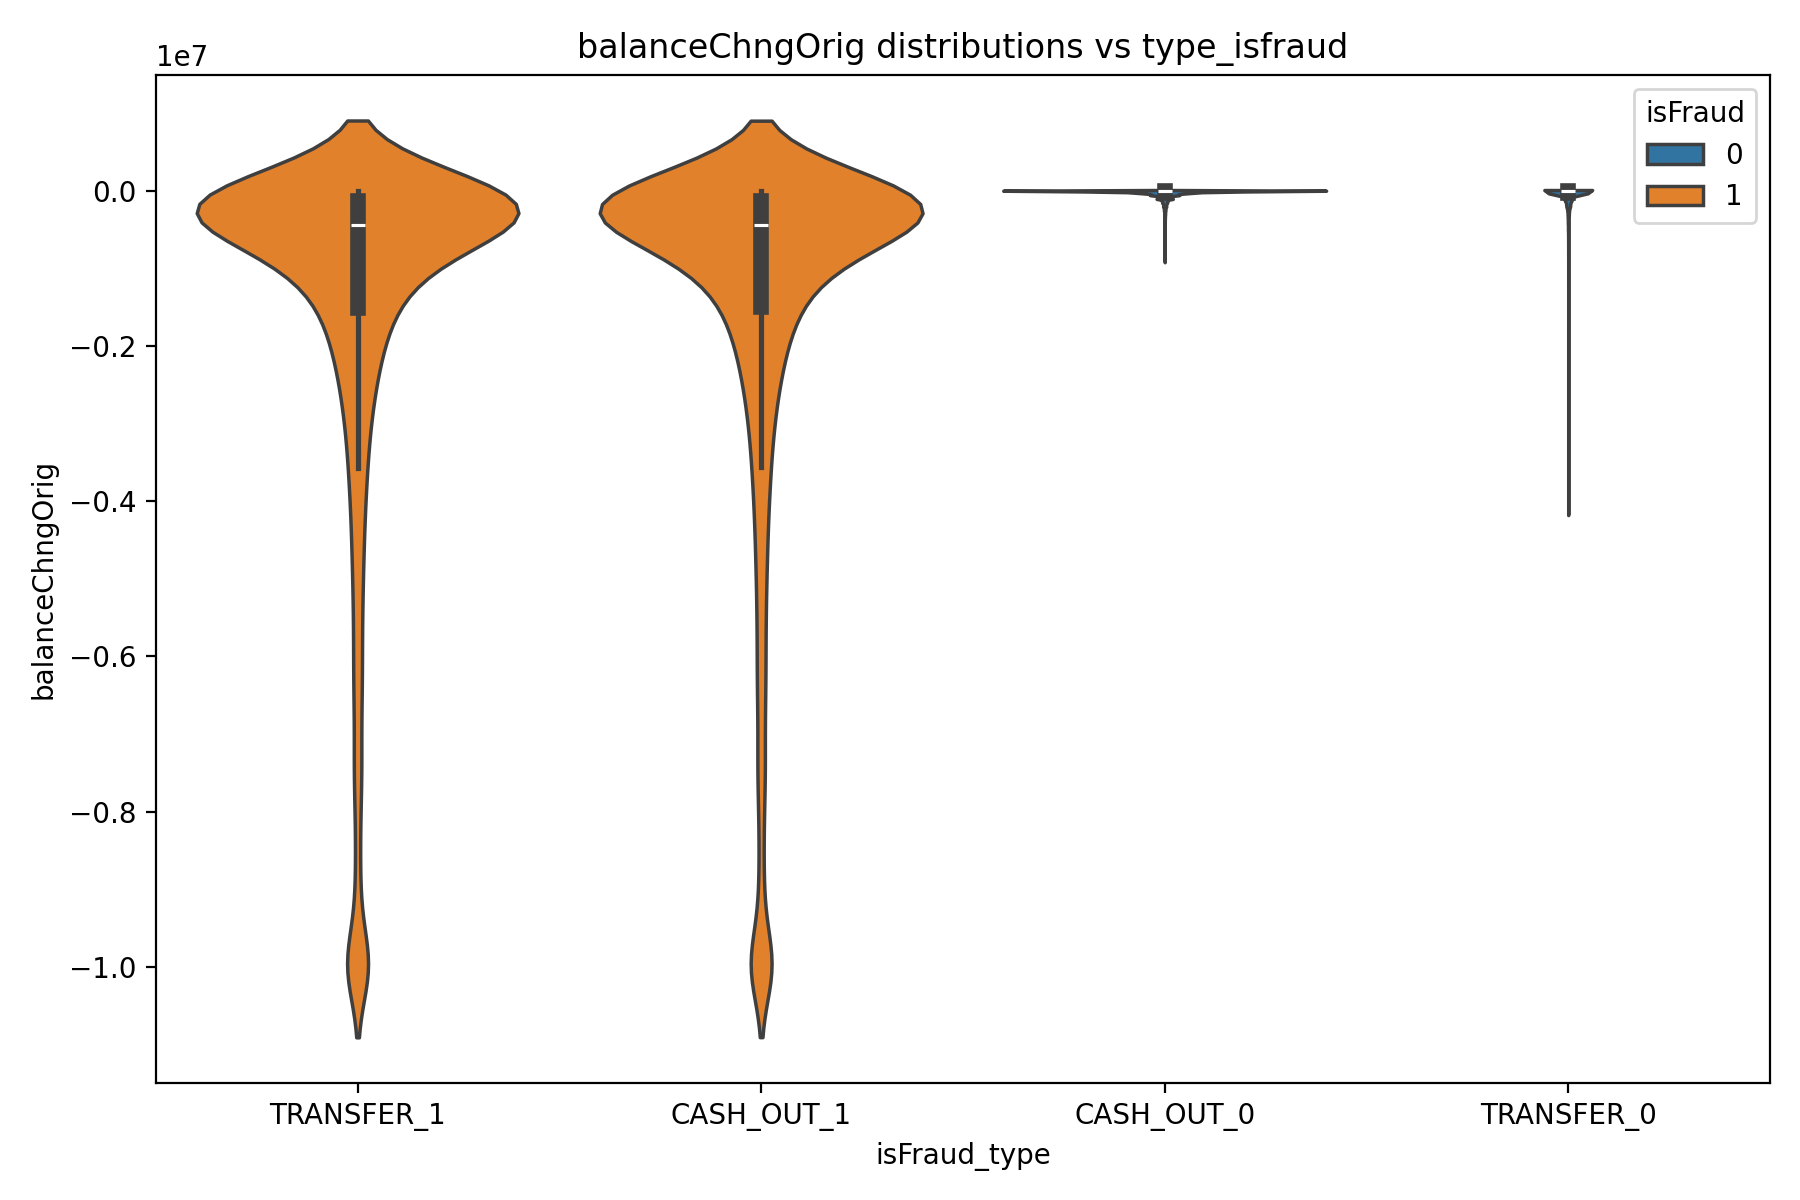

In [86]:
y = 'balanceChngOrig'

fig, ax = plt.subplots(1, 1, figsize=(9, 6))
sns.violinplot(data=df_only_badtypes, x='isFraud_type', hue='isFraud', y=y)
ax.set_title(f'{y} distributions vs type_isfraud')
plt.tight_layout();


- Изменение баланса отправителя при мошенническом переводе явно перекашивает в отрицательную сторону. Большое изменение баланса отправителя подсказывает о подозрительности сделки.
- В мошеннических схемах бывает положительное изменение, в то время как в честных сделках всегда у отправителя уменьшаются деньги.

<IPython.core.display.Javascript object>


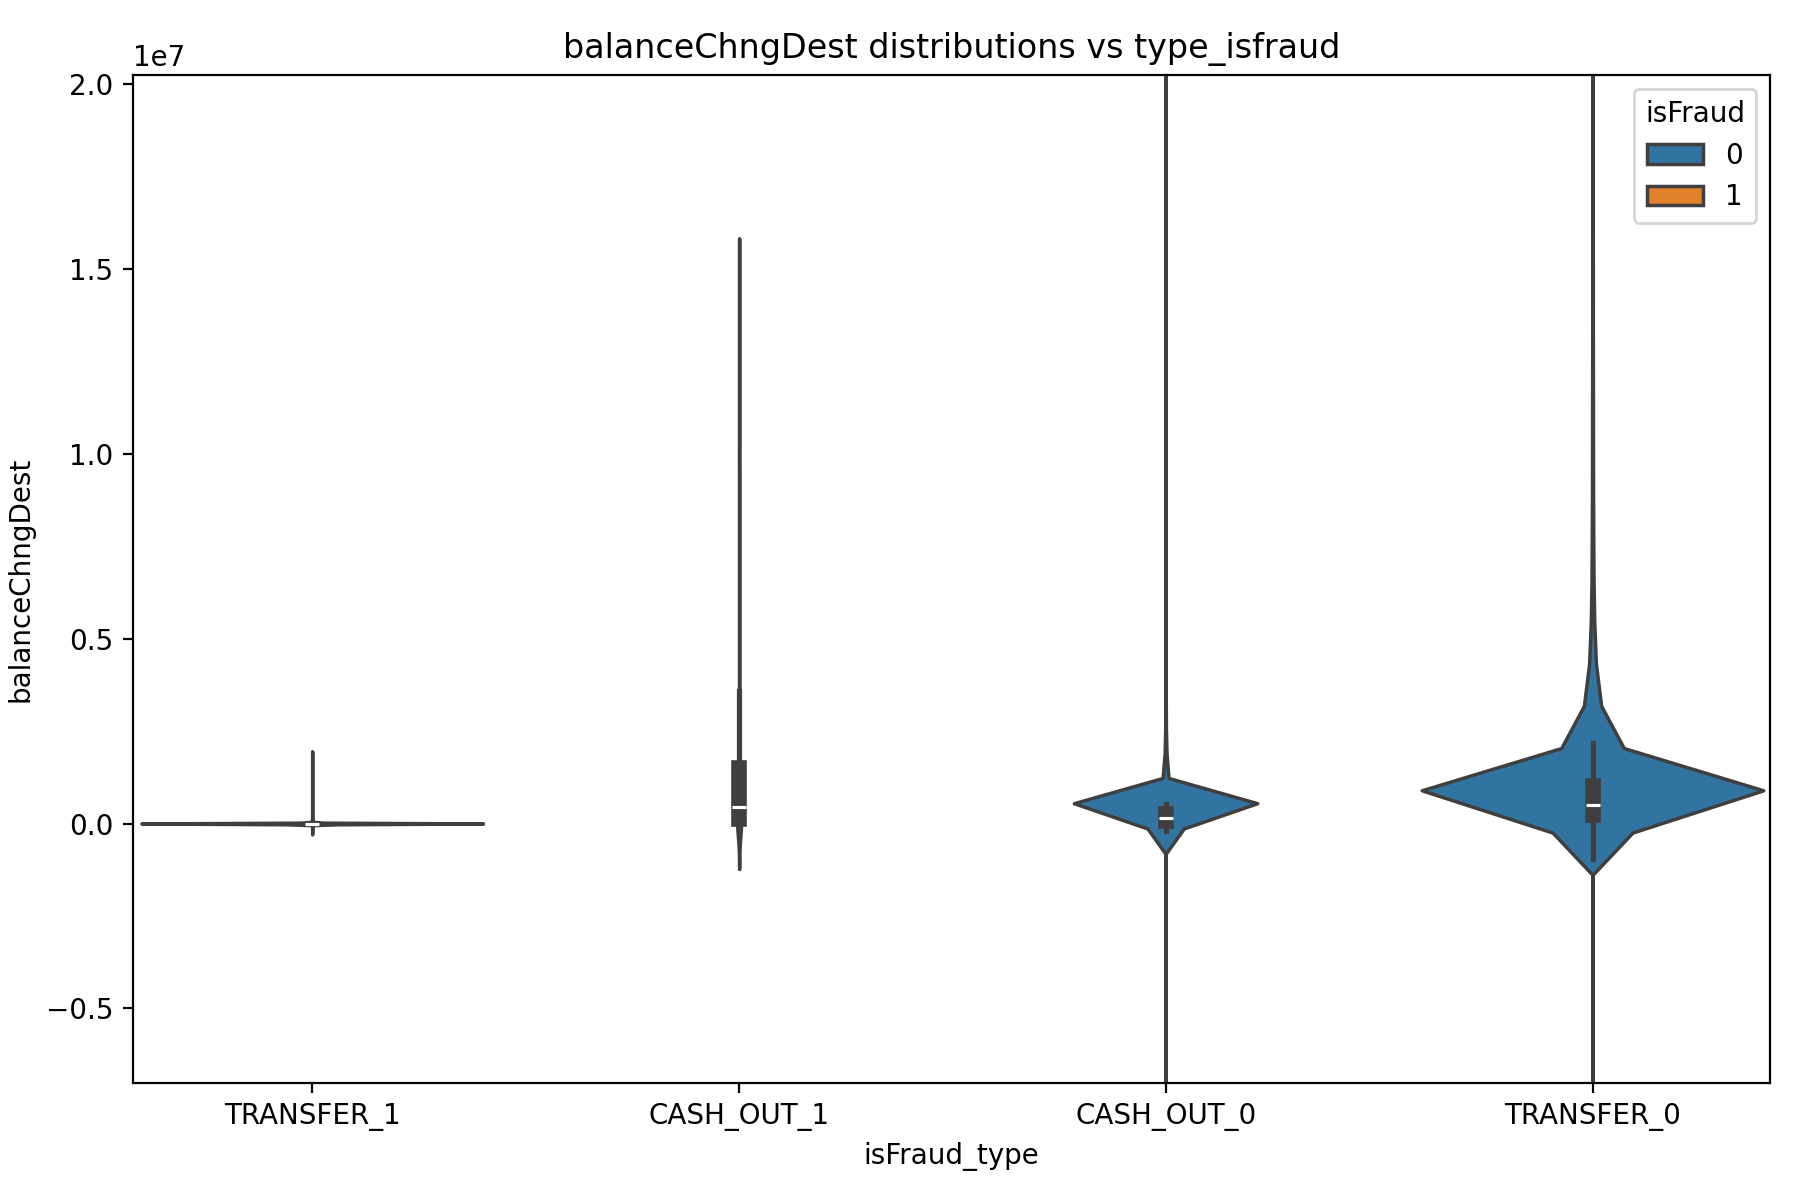

In [80]:
y = 'balanceChngDest'

fig, ax = plt.subplots(1, 1, figsize=(9, 6))
sns.violinplot(data=df_only_badtypes, x='isFraud_type', hue='isFraud', y=y)
ax.set_title(f'{y} distributions vs type_isfraud')
plt.tight_layout();


- Мошеннические переводы в основном не меняют баланса получателя, склонны в сторону положительного.
- Мошеннические выводы более распределены, также склонны к позитивному изменению получателя.
- При честных переводах, распределения более нормальные в обоих типах, около 0.

<IPython.core.display.Javascript object>


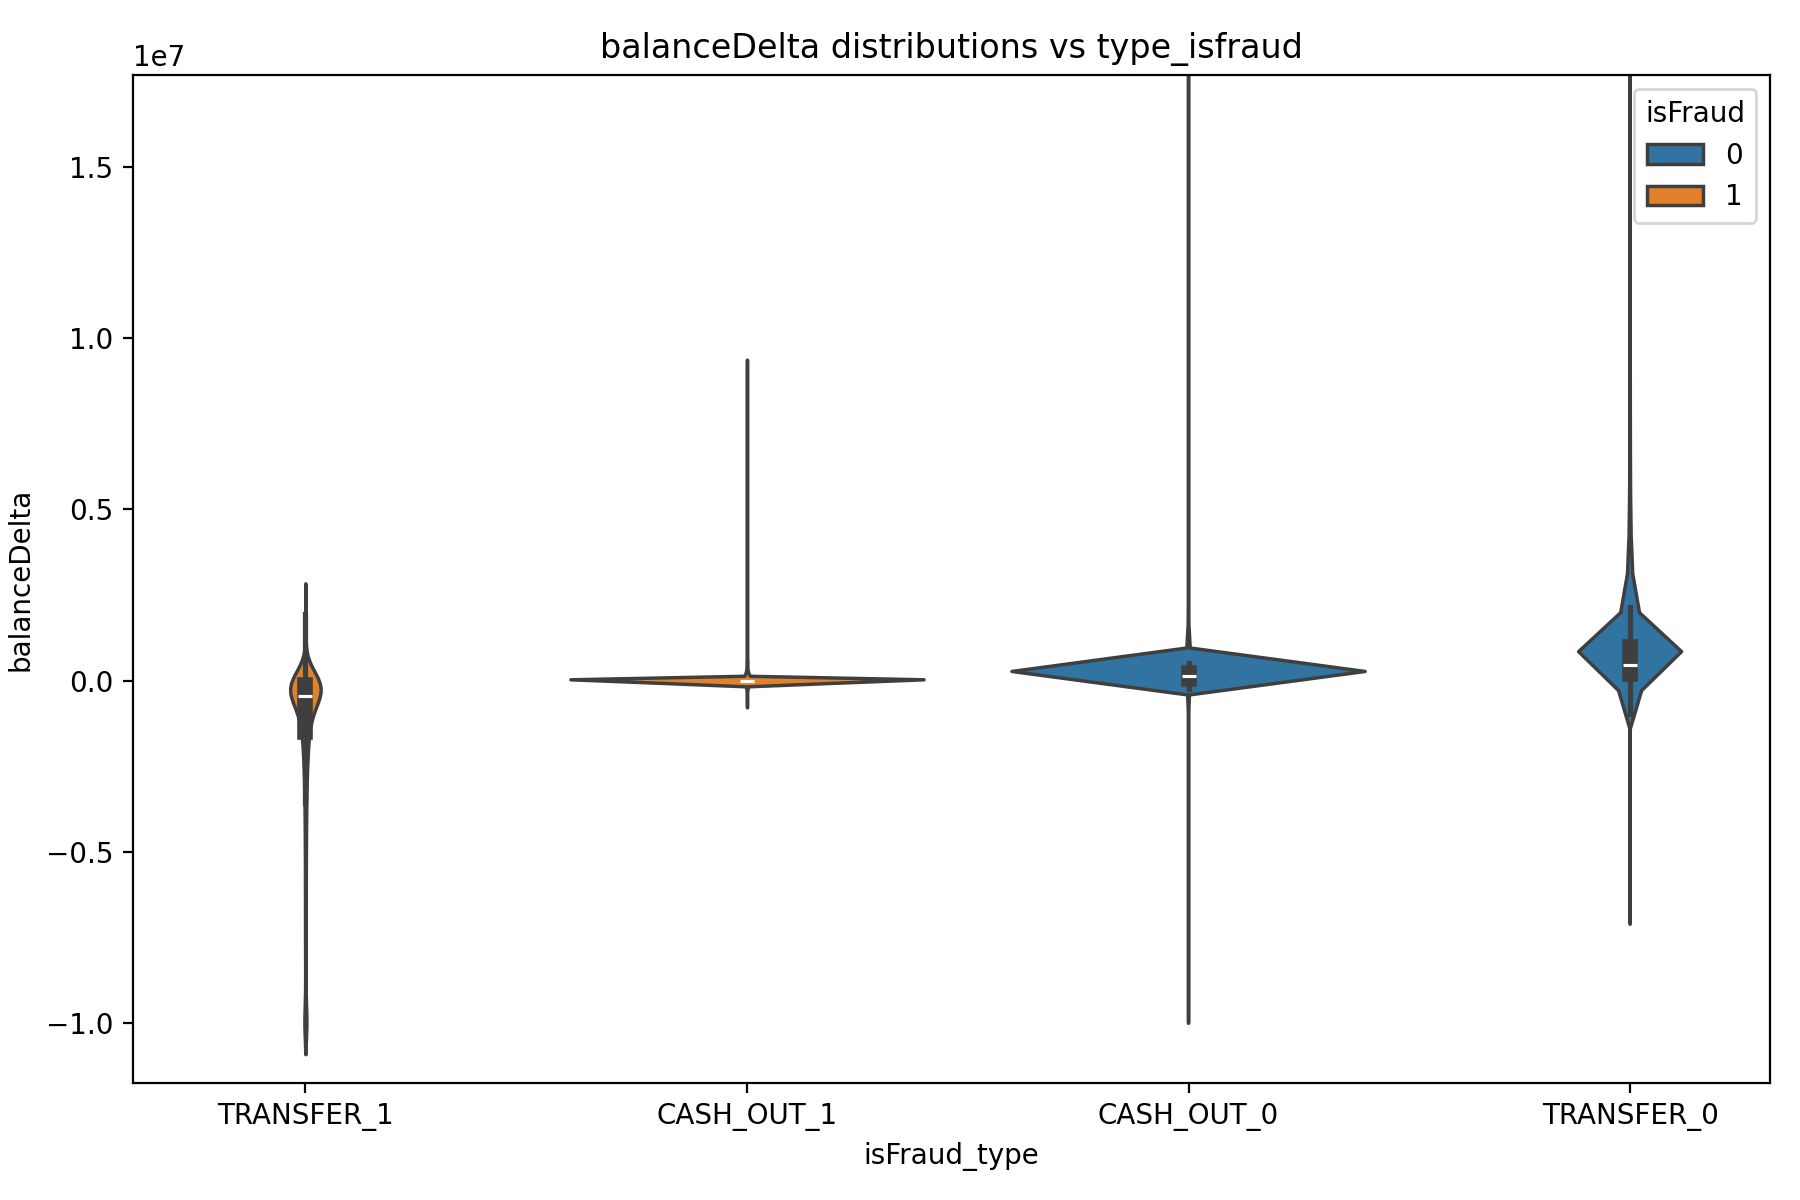

In [81]:
y = 'balanceDelta'

fig, ax = plt.subplots(1, 1, figsize=(9, 6))
sns.violinplot(data=df_only_badtypes, x='isFraud_type', hue='isFraud', y=y)
ax.set_title(f'{y} distributions vs type_isfraud')
plt.tight_layout();


- В мошеннических переводах, дельта баланса склонна к отрицательному, что может говорить о системных, мошеннических схемах. 
- При мошеннических выводах, дельта сконцентрирована около 0, с перекосом в положительную сторону. Положительная дельта - это дополнительные деньги пришедшие извне, может быть какие-то выплаты в виде бонусов, поощрении, процентов и тп. которые злоупотребляются.
- Дельты честных сделок - нормально распределены, около 0.

# Feature engineering

## Проверяем распределения различных соотношении

<IPython.core.display.Javascript object>


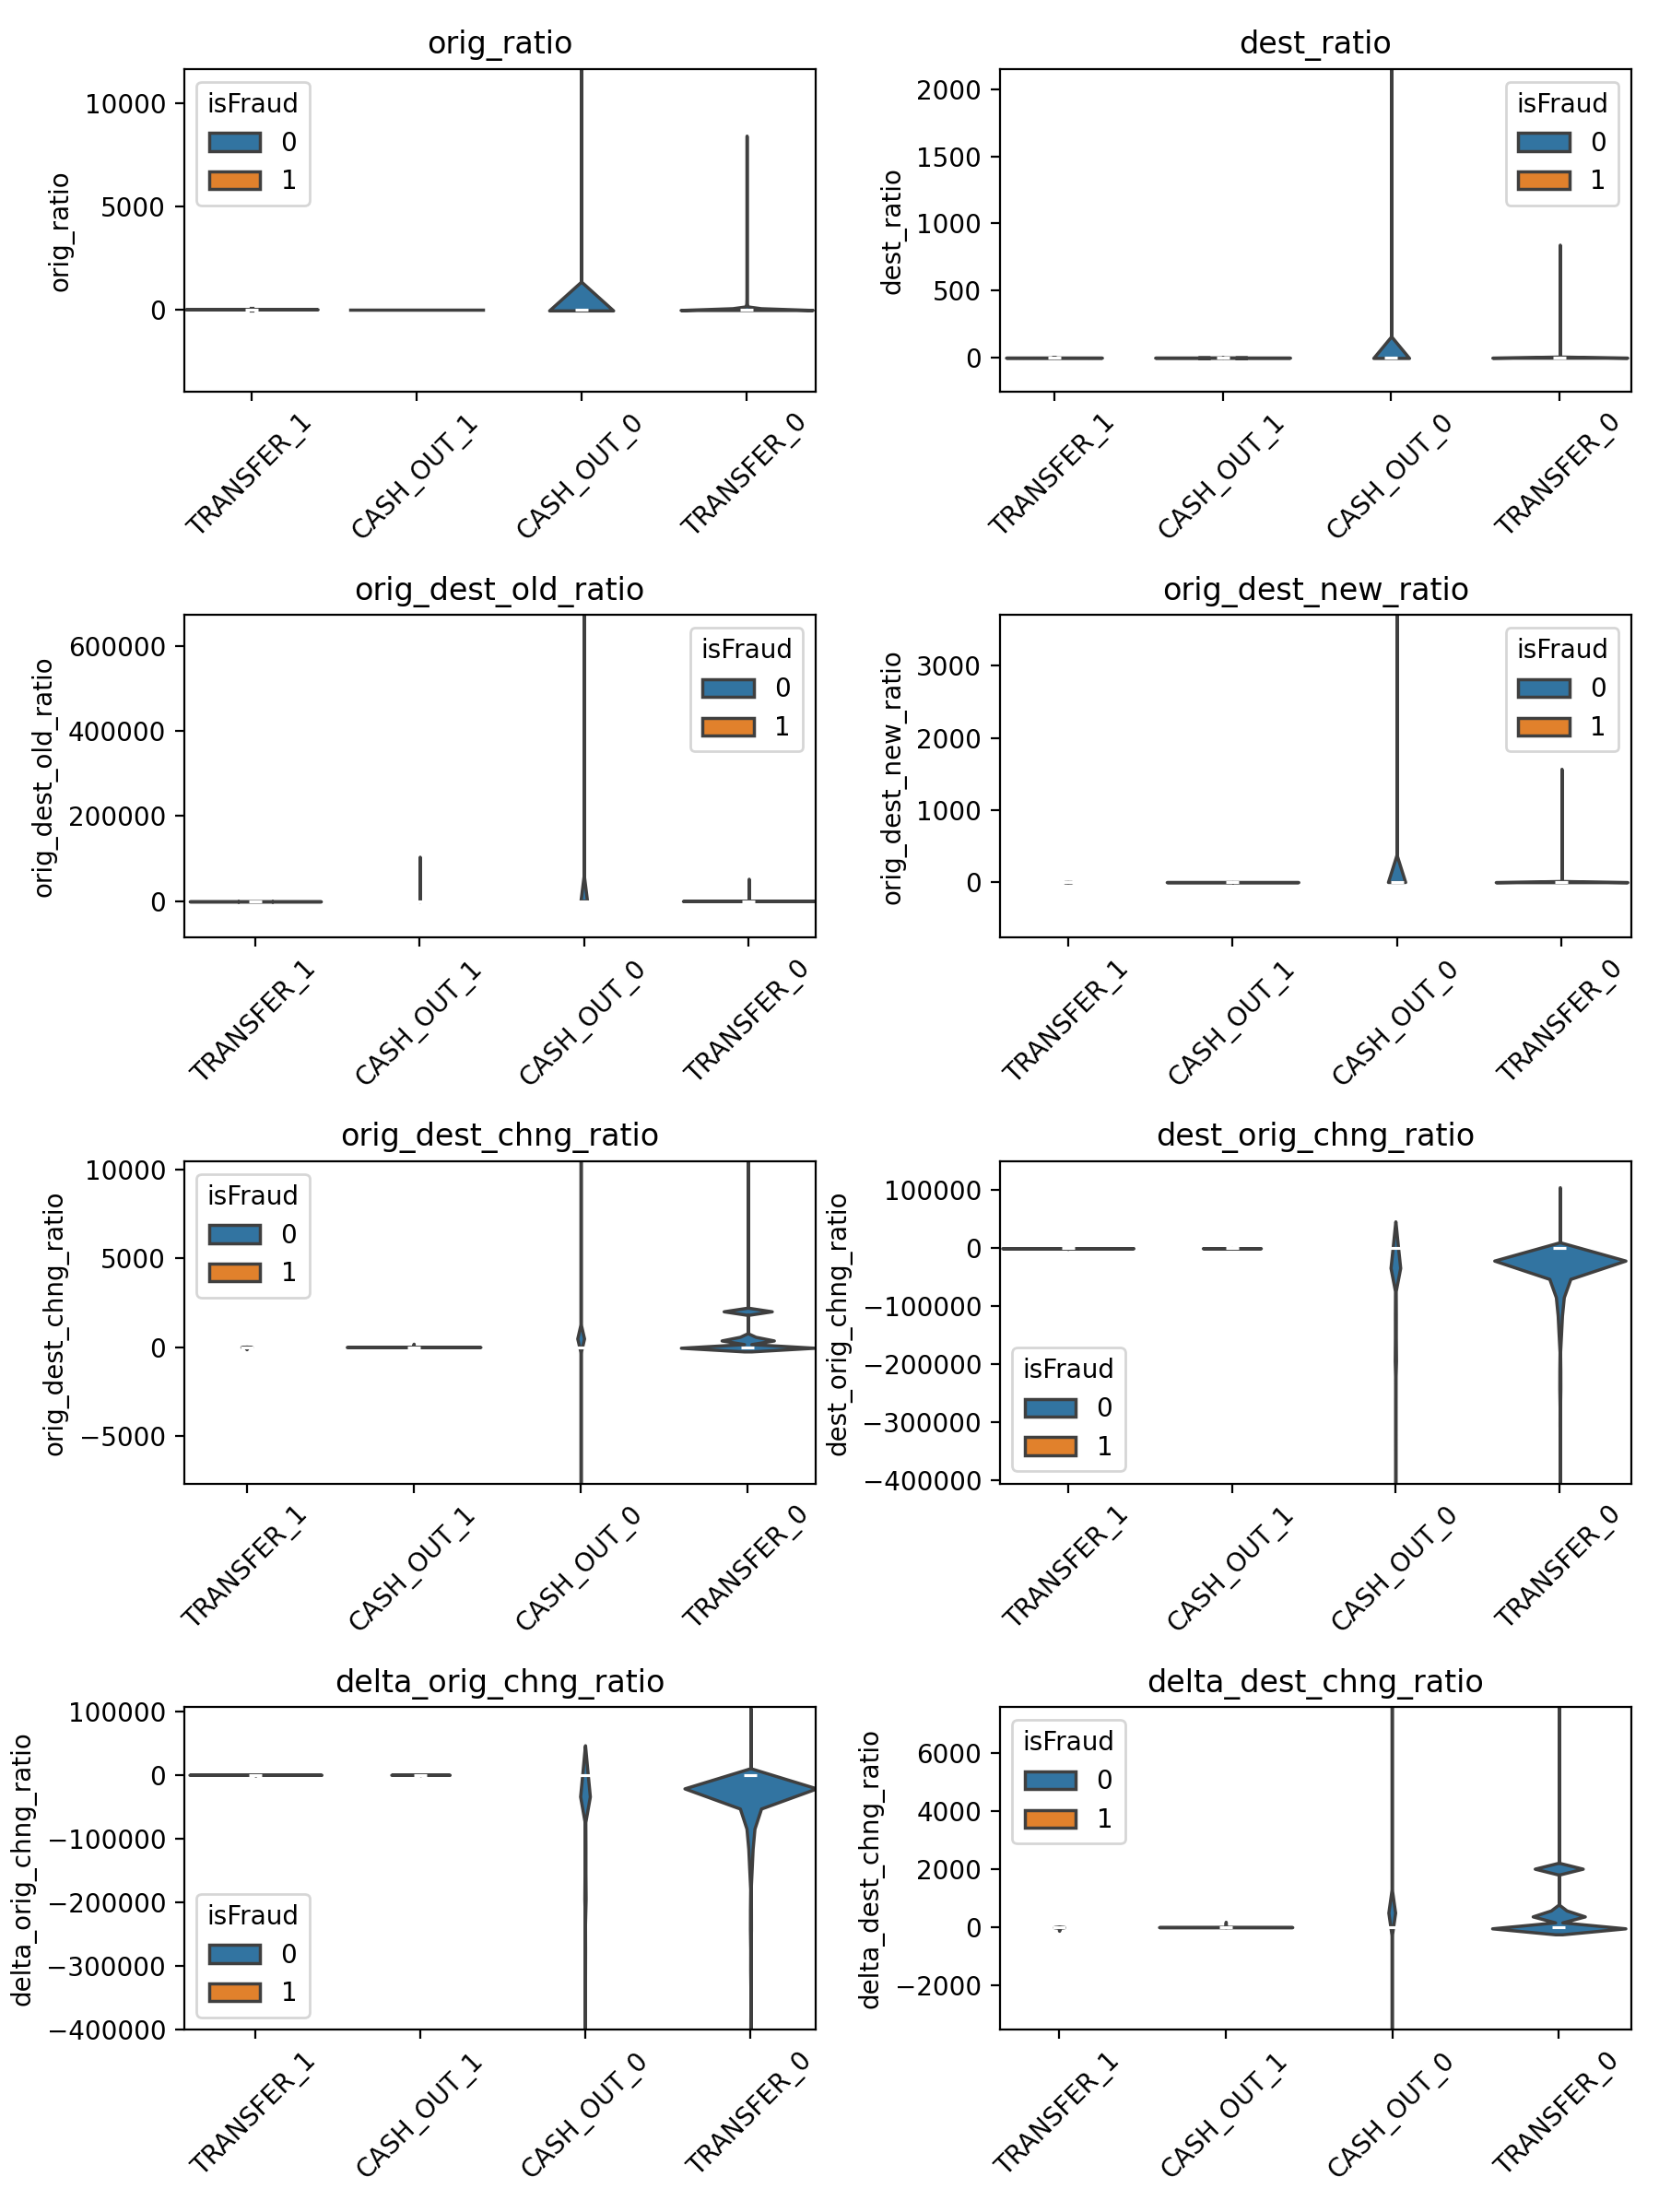

In [115]:
df_only_badtypes['orig_ratio'] = df_only_badtypes['oldbalanceOrg'] / df_only_badtypes['newbalanceOrig']
df_only_badtypes['dest_ratio'] = df_only_badtypes['oldbalanceDest'] / df_only_badtypes['newbalanceDest']
df_only_badtypes['orig_dest_old_ratio'] = df_only_badtypes['oldbalanceOrg'] / df_only_badtypes['oldbalanceDest']
df_only_badtypes['orig_dest_new_ratio'] = df_only_badtypes['newbalanceOrig'] / df_only_badtypes['newbalanceDest']
df_only_badtypes['orig_dest_chng_ratio'] = df_only_badtypes['balanceChngOrig'] / df_only_badtypes['balanceChngDest']
df_only_badtypes['dest_orig_chng_ratio'] = df_only_badtypes['balanceChngDest'] / df_only_badtypes['balanceChngOrig']
df_only_badtypes['delta_orig_chng_ratio'] = df_only_badtypes['balanceDelta'] / df_only_badtypes['balanceChngOrig']
df_only_badtypes['delta_dest_chng_ratio'] = df_only_badtypes['balanceDelta'] / df_only_badtypes['balanceChngDest']

fig, axes = plt.subplots(4, 2, figsize=(9, 12))
axes = axes.flatten()

for ax, col in zip(axes, [
    'orig_ratio',
    'dest_ratio',
    'orig_dest_old_ratio',
    'orig_dest_new_ratio',
    'orig_dest_chng_ratio',
    'dest_orig_chng_ratio',
    'delta_orig_chng_ratio',
    'delta_dest_chng_ratio'
]):
    sns.violinplot(data=df_only_badtypes, x='isFraud_type', hue='isFraud', y=col, ax=ax)
    ax.set_xlabel('')  # Remove x-axis label
    ax.set_title(col)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout();


- Все соотношения стремятся к 0, так как у одного из сторон либо начальный баланс 0 либо конечный.
- Оставим delta_orig_chng_ratio и delta_dest_chng_ratio, так как они вбирают в себя всю информацию.

## Аггрегация мерчантов

- Фроды бывают только в переводах и выводах средств.
- Данные уже являются аггрегатами, скорее всего дневными. 
- Отправители в основном уникальные, поэтому нет смысла аггрегировать по ним. 
- Можно аггрегировать по мерчантам для получения информации об их недавних активностях.

- Скользящие окна: 7, 14, 28, 90, 180
- Агрегаты: sum, avg, std, ma_diff_std, count, xtreme_cnt_90, xtreme_cnt_10


- ma_diff_std: разница текущего значения от средней в стандартных отклонениях.
- xtreme_cnt_90: кол-во экстримальных значении (выше 90% квантиля) в окне
- xtreme_cnt_10: кол-во экстримальных значении (ниже 10% квантиля) в окне

In [19]:
df = pd.read_csv('PS_20174392719_1491204439457_log.csv')
df['balanceChngOrig'] = (df['newbalanceOrig'] - df['oldbalanceOrg'])
df['balanceChngDest'] = (df['newbalanceDest'] - df['oldbalanceDest'])
df['balanceDelta'] = df['balanceChngOrig'] + df['balanceChngDest']
df['delta_orig_chng_ratio'] = df['balanceDelta'] / df['balanceChngOrig']
df['delta_dest_chng_ratio'] = df['balanceDelta'] / df['balanceChngDest']


- Аггрегация мерчантов с двумя или более записями производилась в отдельном файле counting_aggregates_multiproc.py - в целях мультипроцессинга. 
- Аггрегация одиночных мерчантов ниже.

In [20]:
v_c = df['nameDest'].value_counts()
dests_alone = v_c[v_c == 1].index.values
df_alone = df[df['nameDest'].isin(dests_alone)]

columns_to_agg = [
    'oldbalanceOrg',
    'newbalanceOrig',
    'oldbalanceDest',
    'newbalanceDest',
    'balanceChngOrig',
    'balanceChngDest',
    'balanceDelta',
    'delta_orig_chng_ratio',
    'delta_dest_chng_ratio'
]

win_sizes = [7, 14, 28, 90, 180]

for col in columns_to_agg:
    for win_size in win_sizes:
        df_alone[f'{col}_{win_size}_sum'] = df_alone[col]
        df_alone[f'{col}_{win_size}_avg'] = df_alone[col]
        df_alone[f'{col}_{win_size}_std'] = None
        df_alone[f'{col}_{win_size}_count'] = 1
        df_alone[f'{col}_{win_size}_ma_diff_std'] = None
        df_alone[f'{col}_{win_size}_xtreme_cnt_90'] = 0
        df_alone[f'{col}_{win_size}_xtreme_cnt_10'] = 0



In [50]:
df = df_alone  # Здесь поменяю потом

In [53]:
all_columns = df.columns.tolist()

In [56]:
meta_columns = [
    'step',
    'nameOrig',
    'nameDest'
]
y_column = 'isFraud'
x_columns = [a for a in all_columns if a not in (meta_columns + ['isFraud', 'isFlaggedFraud'])]


## Важность фичей

In [58]:
df_train, df_valid = train_test_split(
    df,
    test_size=0.2,
    random_state=42,
    stratify=df[y_column]
)

In [62]:
def objective(trial, data_xy, target_col):
    param = {
        'metric': 'auc',
        'objective': 'regression',  # Define the objective explicitly
        'n_estimators': trial.suggest_int('n_estimators', 10, 500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2, log=True),  # Wider range for exploration
        'max_depth': trial.suggest_int('max_depth', 2, 100),  # Allow deeper trees for more complexity
        'num_leaves': trial.suggest_int('num_leaves', 100, 500),  # Expanded range based on max_depth
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),  # Lower minimum for small datasets
        'min_child_weight': trial.suggest_float('min_child_weight', 1e-3, 1e1, log=True),  # Stability control
        'subsample': trial.suggest_float('subsample', 0.1, 1.0),  # Keep for generalization
        'subsample_freq': trial.suggest_categorical("subsample_freq", [1]),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1.0),  # Explore full range
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-1, 100, log=True),  # Wider range for regularization
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-1, 100, log=True),  # Same as reg_alpha
        'max_bin': trial.suggest_int('max_bin', 100, 1000),  # For finer gradient boosting control
        'feature_fraction': trial.suggest_float('feature_fraction', 0.1, 1.0),  # Alias for colsample_bytree
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.1, 1.0),  # Alias for subsample
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 5),  # To enhance randomization
        'verbose': -1,
        'n_jobs': 10
    }

    splits = TimeSeriesSplit(n_splits=splits_n)
    cv_scores = []
    
    for i, (train_index, test_index) in enumerate(splits.split(data_xy)):
        train = data_xy.iloc[train_index]
        test = data_xy.iloc[test_index]
        
        # Features and target
        X_train = train.drop([target_col], axis=1)
        y_train = train[target_col]
        X_test = test.drop([target_col], axis=1)
        y_test = test[target_col]

        # Train model
        model = lgb.LGBMRegressor(**param)
        model.fit(X_train, y_train,
                  eval_set=[(X_test, y_test)],  # Validation data for early stopping
                  callbacks=[
                        lgb.early_stopping(stopping_rounds=early_rounds),
                    ]
                  )
        
        # Predict an|d calculate RMSE
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        
        mask_train = ~np.isnan(y_train) & ~np.isnan(y_pred_train)
        mask_test = ~np.isnan(y_test) & ~np.isnan(y_pred_test)
        
        rmse_train = np.sqrt(np.nanmean((y_train - y_pred_train) ** 2, axis=0)).mean()
        rmse_test = np.sqrt(np.nanmean((y_test - y_pred_test) ** 2, axis=0)).mean()
        r2_train = r2_score(y_train[mask_train], y_pred_train[mask_train])
        r2_test = r2_score(y_test[mask_test], y_pred_test[mask_test])
        penalty = abs(rmse_train - rmse_test)
        
#         rmse_w = 2
#         r2_w = 3
#         pen_w = 5
        
#         composite_metric = r2_w * (1 - r2_test) + pen_w * penalty
#         composite_metric = r2_test
        composite_metric = rmse_test

        print(f'Split {i}:')
        print('Train:', rmse_train)
        print('Test:', rmse_test)
        print('Penalty', penalty)
        print('R^2 train', r2_train)
        print('R^2 test', r2_test)
        print('metric', composite_metric, '\n')
        
        cv_scores.append(composite_metric)
    
    # Return average RMSE across splits
    cv_avg = np.mean(cv_scores)
    return cv_avg

(452541, 331)